In [209]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import itertools
import time

In [224]:
def ordinalPattern(time_series, d):
    n = len(time_series)
    patterns = []
    for i in range(n - d + 1):
        sub_seq = time_series[i:i + d]
        ranks = np.argsort(np.argsort(sub_seq))
        patterns.append(tuple(ranks))
    return patterns

def ordinalPatternAll(d):
    perms = list(itertools.permutations(range(d)))
    return perms

def ordinalPatternAllIdx(d):
    all_patterns = ordinalPatternAll(d)
    all_patterns_idx = {}
    for i in range(len(all_patterns)):
        all_patterns_idx[i]=all_patterns[i]
    return all_patterns_idx

def timeSeriesPattern(time_series, d):
    patterns = ordinalPattern(time_series, d)
    all_patterns=ordinalPatternAllIdx(d)
    time_series_pattern_idx =[]
    for i in patterns:
        for j in range(len(all_patterns)):
            if i==all_patterns[j]:
                time_series_pattern_idx.append(j)
    return time_series_pattern_idx

def conditionalProbabilityOfOrdinaPatterns(time_series, d):
    q=timeSeriesPattern(time_series, d)
    idx = np.unique(q)
    pe = []
    for i in idx :
        for j in range(len(q)-1):
            if i == q[j]:
                pe.append([q[j],q[j+1]]) 
    s = {}
    s_percent = {}
    for m in idx:
        val =[]
        for i in pe :
            if i[0] == m:
                val.append(i[1])

        p = []
        p_percent = []
        for i in idx:
            c = 0
            for j in val:
                if i == j:
                    c+=1
            p.append(c)
            p_percent.append((c/len(val)*100))
        s[m] = p
        s_percent[m] = p_percent
    return s,s_percent

In [234]:
time_series = [1, 3, 4, 2, 5, 6, 6, 7, 8, 9, 0]
d=2
s,s1=conditionalProbabilityOfOrdinaPatterns(time_series, d)
data = pd.DataFrame(s,index=s.keys(),columns=s.keys())
ap = ordinalPatternAllIdx(d)
print(ap)
data

{0: (0, 1), 1: (1, 0)}


,0,1
0,6,1
1,2,0


In [201]:
OIL=yf.Ticker('CL=F')
oil=OIL.history(period='max',interval='1d')

In [202]:
oil_close = oil['Close'].values

In [238]:
d=3
oil_CPOP,oil_CPOPP=conditionalProbabilityOfOrdinaPatterns(oil_close, d)
data = pd.DataFrame(oil_CPOP,index=oil_CPOP.keys(),columns=oil_CPOP.keys())
datap = pd.DataFrame(oil_CPOPP,index=oil_CPOPP.keys(),columns=oil_CPOPP.keys())
ap = ordinalPatternAllIdx(d)
print('All pattens symbol whit d = '+str(d))
print(ap)

All pattens symbol whit d = 3
{0: (0, 1, 2), 1: (0, 2, 1), 2: (1, 0, 2), 3: (1, 2, 0), 4: (2, 0, 1), 5: (2, 1, 0)}


In [239]:
data

,0,1,2,3,4,5
0,832,0,422,0,375,0
1,427,0,241,0,134,0
2,0,290,0,129,0,346
3,370,0,102,0,276,0
4,0,142,0,271,0,372
5,0,370,0,348,0,614


In [240]:
datap

,0,1,2,3,4,5
0,51.074279,0.000000,55.163399,0.000000,47.770701,0.000000
1,26.212400,0.000000,31.503268,0.000000,17.070064,0.000000
2,0.000000,36.159601,0.000000,17.245989,0.000000,25.975976
3,22.713321,0.000000,13.333333,0.000000,35.159236,0.000000
4,0.000000,17.705736,0.000000,36.229947,0.000000,27.927928
5,0.000000,46.134663,0.000000,46.524064,0.000000,46.096096


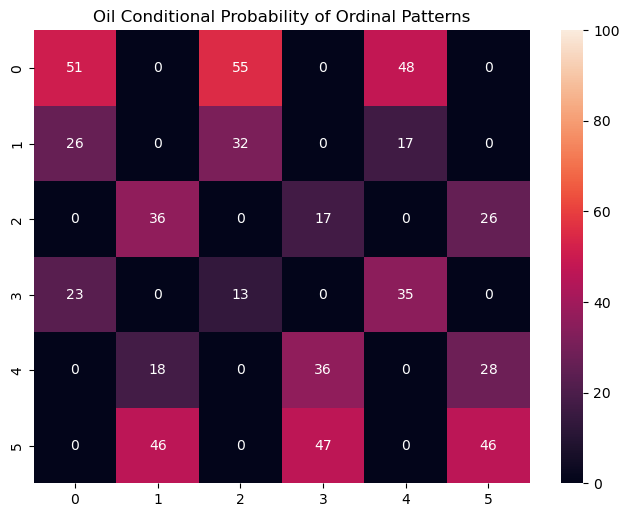

In [242]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Oil Conditional Probability of Ordinal Patterns')
sns.heatmap(datap,vmin=0,vmax=100,annot=True)
plt.show()